In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_excel('/content/Modelo 3.xlsx')

In [ ]:
df

,Total_Prisões,Oficiais,Comissários,Escrivães,Viaturas
0,17,14,38,11,25
1,30,14,38,11,25
2,24,14,38,11,25
3,36,14,38,11,25
4,19,14,36,11,22
...,...,...,...,...,...
204,20,9,9,12,27
205,24,9,9,12,27
206,17,9,9,12,27
207,12,9,9,12,27


In [ ]:
# Separar as features (X) e o target (y)
X = df.drop('Total_Prisões', axis=1)  # Definindo Total de prisões como coluna alvo
y = df['Total_Prisões']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_data, train_targets = X_train, y_train
test_data, test_targets = X_test, y_test

In [ ]:
# Normalizar os dados para facilitar o treinamento da rede
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.transform(test_data)

In [ ]:
# Visualizando um head dos dados
X_train_scaled[0]

array([-0.85897579, -0.90105358, -0.27224887, -0.0886928 ])

In [ ]:
# Definindo a métrica RMSE personalizada
def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Converte y_true para float32
    y_pred = tf.cast(y_pred, tf.float32)  # Converte y_pred para float32
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [ ]:
#  Construção do Modelo
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1:])))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[rmse])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,921 (163.75 KB)

 Trainable params: 41,921 (163.75 KB)

 Non-trainable params: 0 (0.00 B)

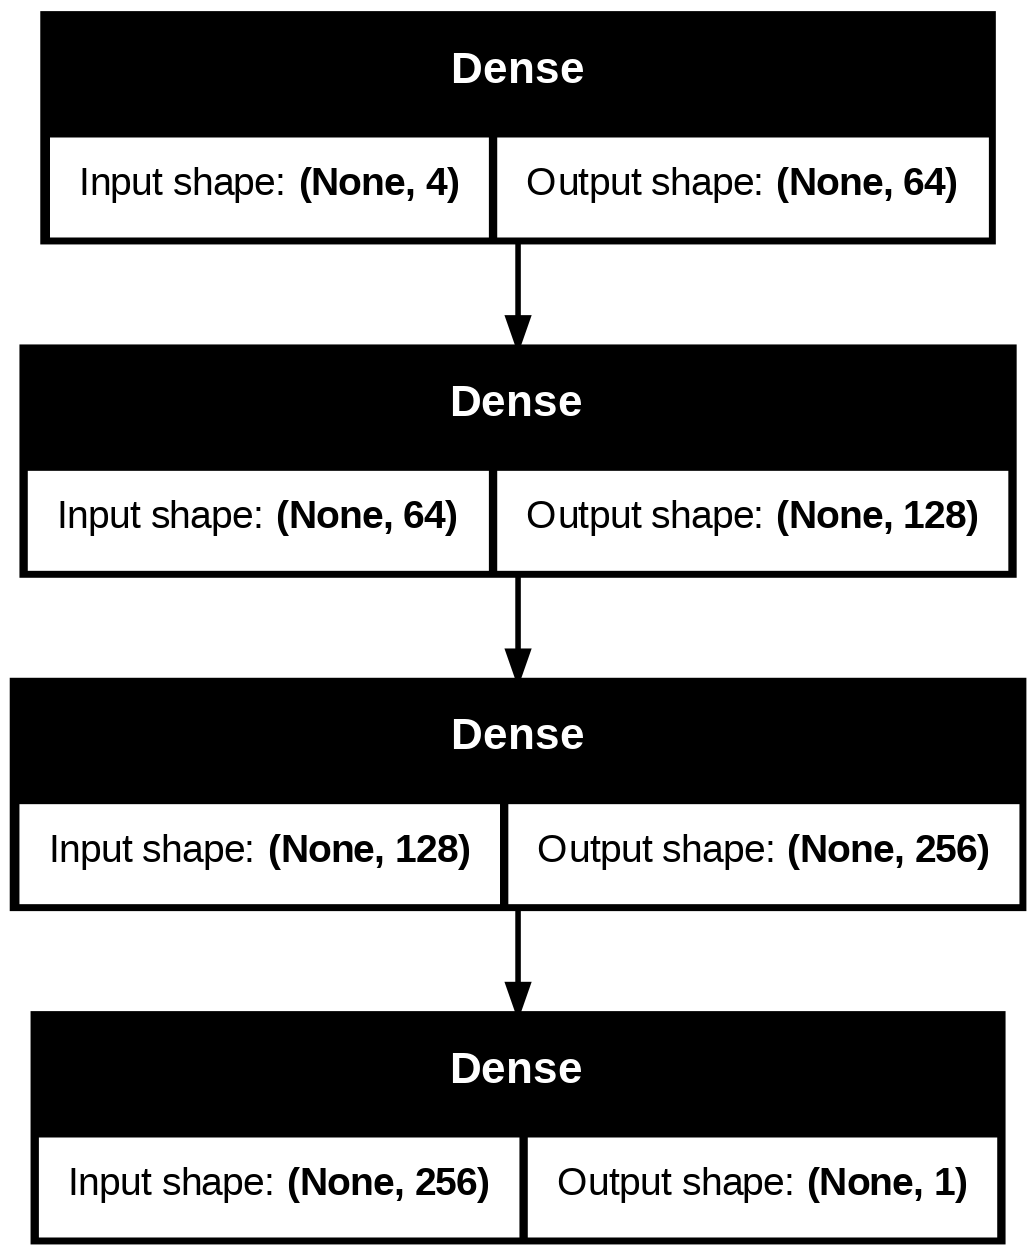

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#Treinar o modelo
history = model.fit(train_data, train_targets, epochs=150, validation_split=0.2)

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 271.1537 - rmse: 15.6532 - val_loss: 65.4594 - val_rmse: 7.9745
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 44.3055 - rmse: 6.5860 - val_loss: 41.0262 - val_rmse: 5.8220
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 59.2664 - rmse: 7.5686 - val_loss: 31.1026 - val_rmse: 4.8872
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 40.6784 - rmse: 6.2665 - val_loss: 33.0147 - val_rmse: 5.2892
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 33.5061 - rmse: 5.9429 - val_loss: 33.2751 - val_rmse: 5.4801
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 30.6697 - rmse: 5.3441 - val_loss: 27.3897 - val_rmse: 4.6597
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 38.7323 - rmse: 6.1048 - val_loss: 27.8349 - val_rmse: 4.5952
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 37.1562 - rmse: 6.0146 - val_loss: 27.3368 - val_rmse: 4.6719
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_rmse = model.evaluate(test_data, test_targets)
print(f"RMSE no teste: {test_rmse:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.3888 - rmse: 5.3898 
RMSE no teste: 5.665


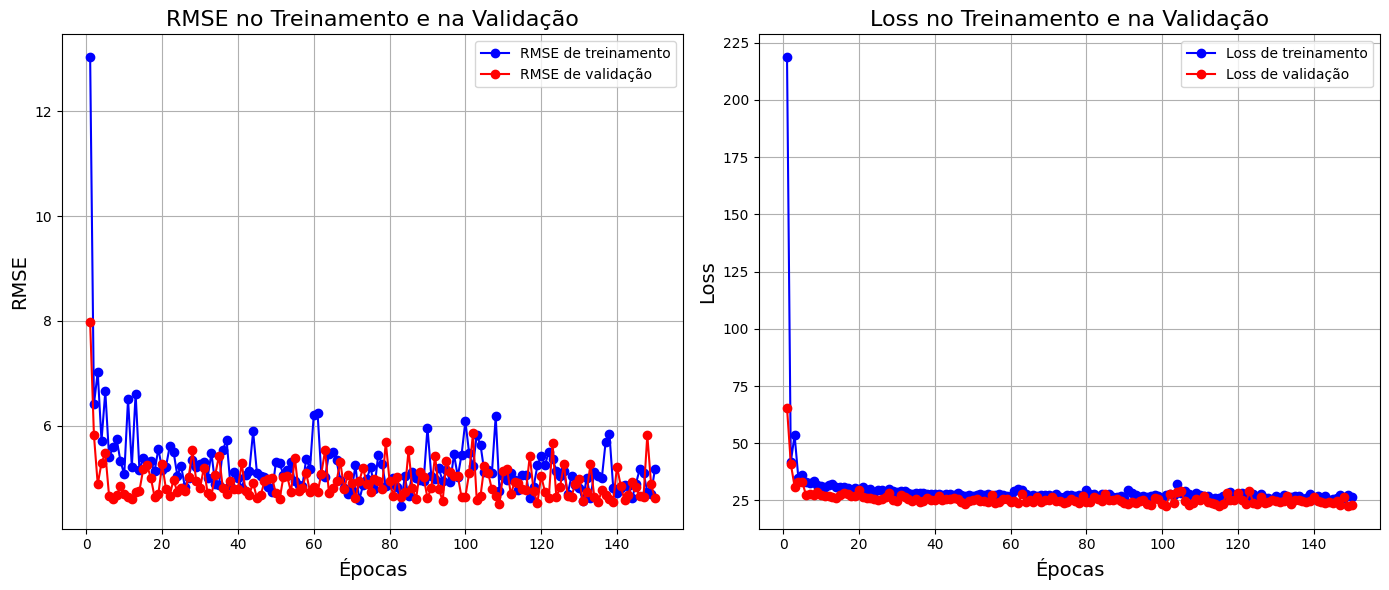

In [ ]:
import matplotlib.pyplot as plt

# Suponha que 'history' é o retorno da função fit() do seu modelo
loss = history.history['loss']
val_loss = history.history['val_loss']
rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(1, len(loss) + 1)

# Plot da RMSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, rmse, 'o-', color='blue', label='RMSE de treinamento')
plt.plot(epochs, val_rmse, 'o-', color='red', label='RMSE de validação')
plt.title('RMSE no Treinamento e na Validação', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend()
plt.grid(True)

# Plot da perda
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'o-', color='blue', label='Loss de treinamento')
plt.plot(epochs, val_loss, 'o-', color='red', label='Loss de validação')
plt.title('Loss no Treinamento e na Validação', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Predição e visualização
predictions = model.predict(test_data)

# Colocar valores reais e preditos em um DataFrame
results_df = pd.DataFrame({'Valor Real': test_targets, 'Valor Predito': predictions.flatten()})

# Exibir o DataFrame
print(results_df.head(50))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
     Valor Real  Valor Predito
30           19      21.227934
171          16      15.816675
84           20      22.962105
198          10      17.553831
60           28      18.397209
155          24      17.831951
45           21      20.671175
181          18      17.106525
9            28      19.470987
195          15      17.553831
136          12      15.218718
186          11      16.469648
206          17      17.169395
126          15      17.831951
15           28      24.529982
73           25      18.801462
165          10      14.415314
18           28      21.701498
167          16      14.415314
93           26      16.301155
75           18      18.801462
55           22      19.037554
147          18      17.139429
109          14      19.271559
108          18      19.271559
142          21      15.934994
25           26      25.806339
125          13      17.884623
16           14      24.529982
172          13      15.816675
1

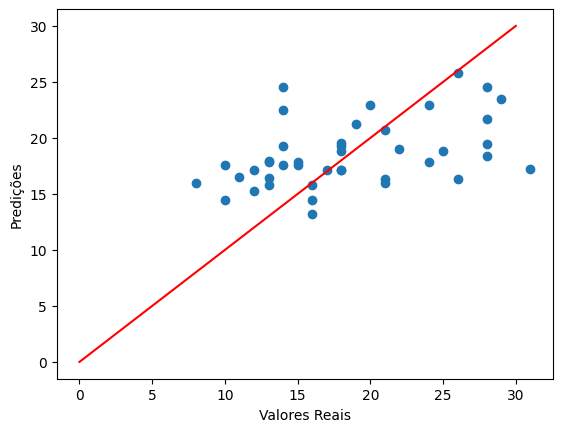

In [ ]:
# Plotar previsões vs valores reais
plt.scatter(test_targets, predictions)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.plot([0, 30], [0, 30], color='red')  # Linha y=x
plt.show()